In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# test_df = pd.read_parquet('./orderbook/orderbook_2017.parquet')
# test_df

,price,volume,timestamp,side,trade_id,datetime,date
0,968.750,0.010000,1483229267,s,581775,2017-01-01 00:07:47,2017-01-01
1,966.919,0.181308,1483229269,s,581776,2017-01-01 00:07:49,2017-01-01
2,966.919,0.121051,1483229288,s,581777,2017-01-01 00:08:08,2017-01-01
3,966.919,0.156856,1483229578,s,581778,2017-01-01 00:12:58,2017-01-01
4,966.919,0.106823,1483229582,s,581779,2017-01-01 00:13:02,2017-01-01
...,...,...,...,...,...,...,...
5175834,13989.900,0.001840,1514764799,s,5752434,2017-12-31 23:59:59,2017-12-31
5175835,13989.900,0.001882,1514764799,s,5752435,2017-12-31 23:59:59,2017-12-31
5175836,13990.000,0.006548,1514764799,s,5752436,2017-12-31 23:59:59,2017-12-31
5175837,13990.000,0.006000,1514764799,s,5752437,2017-12-31 23:59:59,2017-12-31


In [ ]:
# test_df['datetime'] = test_df['timestamp'].apply(lambda x: pd.to_datetime(x*10**9, unit='ns'))

In [ ]:
# test_df['date'] = test_df['datetime'].apply(lambda x: str(x)[:10])
# test_df

,price,volume,timestamp,side,trade_id,datetime,date
0,968.750,0.010000,1483229267,s,581775,2017-01-01 00:07:47,2017-01-01
1,966.919,0.181308,1483229269,s,581776,2017-01-01 00:07:49,2017-01-01
2,966.919,0.121051,1483229288,s,581777,2017-01-01 00:08:08,2017-01-01
3,966.919,0.156856,1483229578,s,581778,2017-01-01 00:12:58,2017-01-01
4,966.919,0.106823,1483229582,s,581779,2017-01-01 00:13:02,2017-01-01
...,...,...,...,...,...,...,...
5175834,13989.900,0.001840,1514764799,s,5752434,2017-12-31 23:59:59,2017-12-31
5175835,13989.900,0.001882,1514764799,s,5752435,2017-12-31 23:59:59,2017-12-31
5175836,13990.000,0.006548,1514764799,s,5752436,2017-12-31 23:59:59,2017-12-31
5175837,13990.000,0.006000,1514764799,s,5752437,2017-12-31 23:59:59,2017-12-31


In [145]:
# test_df.to_parquet('./orderbook/orderbook_2024.parquet')

In [153]:
test_df = pd.read_parquet('./orderbook/orderbook_2018.parquet')

In [154]:
real_test_df = test_df.head(100)
date_list = test_df['date'].unique()

In [155]:
# side 체크해서 volume sign 변경
def bs_check(volume, side):
    if side == 's':
        volume = -volume
    else:
        volume = volume
    return volume

In [156]:
# def get_vpin(df, V=1):
#     volume_buckets = []
#     vpin_buckets = []

#     volume_bucket = np.array([])
#     vpin_bucket = np.array([])

#     remain_volume = 0

#     # 한 행씩 실행
#     # 각 조건에 맞춰 Volume Bucket, VPIN Bucket 채워넣기
#     # 설정한 Bucket 한도가 넘으면 다른 Bucket으로 이동
#     last_num = len(df)-1
#     count = 0
#     for i in df.iterrows():
#         trading_volume = i[1].volume
#         trading_side = i[1].side
#         if len(volume_bucket)==0:
#             volume_bucket = np.append(volume_bucket, trading_volume)
#             vpin_bucket = np.append(vpin_bucket, bs_check(trading_volume, trading_side))
#         else:
#             volume_bucket_sum = np.sum(volume_bucket)

#             if ((volume_bucket_sum < V) & ((V - volume_bucket_sum) > trading_volume)):
#                 volume_bucket = np.append(volume_bucket, trading_volume)
#                 vpin_bucket = np.append(vpin_bucket, bs_check(trading_volume, trading_side))
#             elif ((volume_bucket_sum < V) & ((V - volume_bucket_sum) == trading_volume)):
#                 volume_bucket = np.append(volume_bucket, trading_volume)
#                 vpin_bucket = np.append(vpin_bucket, bs_check(trading_volume, trading_side))

#                 ### bucket 초기화
#                 volume_bucket = np.array([])
#                 vpin_bucket = np.array([])

#             elif ((volume_bucket_sum < V) & ((V - volume_bucket_sum) < trading_volume)):
#                 last_volume = (V - volume_bucket_sum)
#                 remain_volume = trading_volume - last_volume
#                 volume_bucket = np.append(volume_bucket, last_volume)
#                 vpin_bucket = np.append(vpin_bucket, bs_check(last_volume, trading_side))

#                 ### buckets에 가득 채워진 bucket 넣기
#                 volume_buckets.append(volume_bucket)
#                 vpin_buckets.append(vpin_bucket)

#                 ### bucket 초기화
#                 volume_bucket = np.array([])
#                 vpin_bucket = np.array([])

#                 # remain volume이 V보다 클때
#                 while (V <= remain_volume):
#                     last_volume = (V)
#                     remain_volume -= V
#                     ### remain volume bucket에 넣기
#                     volume_bucket = np.append(volume_bucket, V)
#                     vpin_bucket = np.append(vpin_bucket, bs_check(V, trading_side))

#                     ### buckets에 가득 채워진 bucket 넣기
#                     volume_buckets.append(volume_bucket)
#                     vpin_buckets.append(vpin_bucket)

#                     ### bucket 초기화
#                     volume_bucket = np.array([])
#                     vpin_bucket = np.array([])

#                 if remain_volume != 0:
#                     volume_bucket = np.append(volume_bucket, remain_volume)
#                     vpin_bucket = np.append(vpin_bucket, bs_check(remain_volume, trading_side))

#         if count == last_num:
#             if len(volume_bucket) != 0:
#                 ### buckets에 가득 채워진 bucket 넣기
#                 volume_buckets.append(volume_bucket)
#                 vpin_buckets.append(vpin_bucket)

#         count+=1


#     n = len(volume_buckets)


#     sum_of_vpin = 0

#     for vpin_bucket in vpin_buckets:
#         sum_of_vpin += abs(np.sum(vpin_bucket))

#     if n == 0:
#         VPIN = 0
#     else:
#         VPIN = 1/(V*n)*sum_of_vpin

#     return VPIN


def get_vpin(df, V=1):
    volume_buckets = []
    vpin_buckets = []

    volume_bucket = np.array([])
    vpin_bucket = np.array([])

    remain_volume = 0

    last_num = len(df.index) - 1
    count = 0

    for row in df.itertuples():
        trading_volume = row.volume
        trading_side = row.side

        if len(volume_bucket) == 0:
            volume_bucket = np.append(volume_bucket, trading_volume)
            vpin_bucket = np.append(vpin_bucket, bs_check(trading_volume, trading_side))

            
        else:
            volume_bucket_sum = np.sum(volume_bucket)
            if (volume_bucket_sum >= V):
                remain_volume = volume_bucket_sum
                while V <= remain_volume:
                    volume_bucket = np.append(volume_bucket, V)
                    vpin_bucket = np.append(vpin_bucket, bs_check(V, trading_side))

                    volume_buckets.append(volume_bucket)
                    vpin_buckets.append(vpin_bucket)

                    volume_bucket = np.array([])
                    vpin_bucket = np.array([])

                    remain_volume -= V
                if remain_volume > 0 and remain_volume < V:
                    volume_bucket = np.append(volume_bucket, remain_volume)
                    vpin_bucket = np.append(vpin_bucket, bs_check(remain_volume, trading_side))

            elif (volume_bucket_sum < V) and ((V - volume_bucket_sum) > trading_volume):
                volume_bucket = np.append(volume_bucket, trading_volume)
                vpin_bucket = np.append(vpin_bucket, bs_check(trading_volume, trading_side))
            elif (volume_bucket_sum < V) and ((V - volume_bucket_sum) == trading_volume):
                volume_bucket = np.append(volume_bucket, trading_volume)
                vpin_bucket = np.append(vpin_bucket, bs_check(trading_volume, trading_side))

                volume_buckets.append(volume_bucket)
                vpin_buckets.append(vpin_bucket)

                volume_bucket = np.array([])
                vpin_bucket = np.array([])

            elif (volume_bucket_sum < V) and ((V - volume_bucket_sum) < trading_volume):
                last_volume = V - volume_bucket_sum
                remain_volume = trading_volume - last_volume
                volume_bucket = np.append(volume_bucket, last_volume)
                vpin_bucket = np.append(vpin_bucket, bs_check(last_volume, trading_side))

                volume_buckets.append(volume_bucket)
                vpin_buckets.append(vpin_bucket)

                volume_bucket = np.array([])
                vpin_bucket = np.array([])

                while V <= remain_volume:
                    volume_bucket = np.append(volume_bucket, V)
                    vpin_bucket = np.append(vpin_bucket, bs_check(V, trading_side))

                    volume_buckets.append(volume_bucket)
                    vpin_buckets.append(vpin_bucket)

                    volume_bucket = np.array([])
                    vpin_bucket = np.array([])

                    remain_volume -= V

                if remain_volume > 0 and remain_volume < V:
                    volume_bucket = np.append(volume_bucket, remain_volume)
                    vpin_bucket = np.append(vpin_bucket, bs_check(remain_volume, trading_side))

        if count == last_num and len(volume_bucket) != 0:
            volume_buckets.append(volume_bucket)
            vpin_buckets.append(vpin_bucket)

        count += 1

    n = len(volume_buckets)
    sum_of_vpin = sum(abs(np.sum(bucket)) for bucket in vpin_buckets)

    VPIN = 0 if n == 0 else 1 / (V * n) * sum_of_vpin

    return VPIN


In [167]:
year_list = [2019,2020,2021,2022,2023,2024]

for year in year_list:
    test_df = pd.read_parquet(f'./orderbook/orderbook_{year}.parquet')

    date_list = test_df['date'].unique()
    VPIN_dict = dict()
    for date in date_list:
        part_df = test_df[test_df['date']==date]
        VPIN = get_vpin(part_df, V=10)
        VPIN_dict[date] = VPIN

    vpin_df = pd.DataFrame([VPIN_dict]).T
    vpin_df.columns = ['vpin']
    vpin_df.to_csv(f'./vpin/{year}_vpin.csv', index=True)
    

In [158]:
vpin_df = pd.DataFrame([VPIN_dict]).T
vpin_df.columns = ['vpin']

<Axes: >

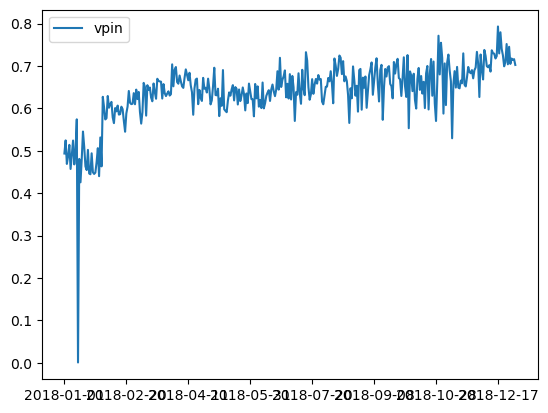

In [159]:
vpin_df.plot()

In [160]:
vpin_df.to_csv('./vpin/2018_vpin.csv', index=True)

In [ ]:
(pd.DataFrame([VPIN_dict]).T).min()

0    0.523186
dtype: float64

: 

In [168]:
import glob

vpin_list = glob.glob('./vpin/*.csv')

vpin_last_df = pd.DataFrame()

for vpin in vpin_list:
    vpin_part = pd.read_csv(vpin)
    vpin_last_df = pd.concat([vpin_last_df, vpin_part])

vpin_last_df

,Unnamed: 0,vpin
0,2017-01-01,0.716836
1,2017-01-02,0.673654
2,2017-01-03,0.649866
3,2017-01-04,0.706062
4,2017-01-05,0.701045
...,...,...
361,2024-12-27,0.709509
362,2024-12-28,0.538008
363,2024-12-29,0.620380
364,2024-12-30,0.669010


In [169]:
vpin_last_df.columns = ['date', 'vpin']
vpin_last_df = vpin_last_df.set_index('date')
vpin_last_df.to_csv('./vpin/vpin.csv', index=True)

In [170]:
vpin_last_df = pd.read_csv('./vpin/vpin.csv')
vpin_last_df  = vpin_last_df.set_index('date')
vpin_last_df

,vpin
date,
2017-01-01,0.716836
2017-01-02,0.673654
2017-01-03,0.649866
2017-01-04,0.706062
2017-01-05,0.701045
...,...
2024-12-27,0.709509
2024-12-28,0.538008
2024-12-29,0.620380


<Axes: xlabel='date'>

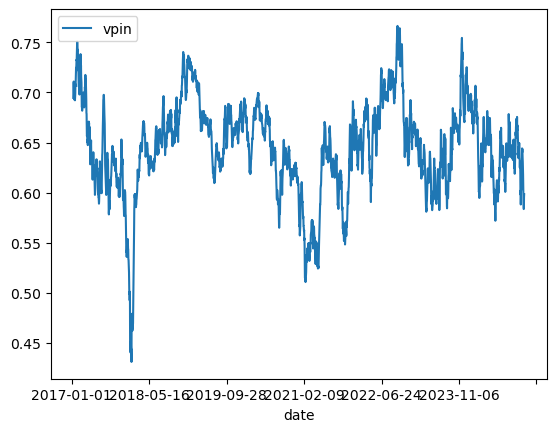

In [172]:
vpin_last_df.rolling(10).mean().plot()